In [26]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables (Antecedents)
negative_mood = ctrl.Antecedent(np.arange(0, 11, 1), , 'negative_mood')
sleep_quantity = ctrl.Antecedent(np.arange(0, 11, 1), 'sleep_quantity')
energy_levels = ctrl.Antecedent(np.arange(0, 11, 1), 'energy_levels')
cognitive_decline = ctrl.Antecedent(np.arange(0, 11, 1), 'cognitive_decline')
social_engagement = ctrl.Antecedent(np.arange(0, 11, 1), 'social_engagement')
stress_levels = ctrl.Antecedent(np.arange(0, 11, 1), 'stress_levels')
#self_esteem = ctrl.Antecedent(np.arange(0, 11, 1), 'self_esteem')
#appetite_changes = ctrl.Antecedent(np.arange(0, 11, 1), 'appetite_changes')


# Output variable (Consequent)
depression_level = ctrl.Consequent(np.arange(0, 101, 1), 'depression_level')

# Membership functions for input and output variables (3 levels)
for var in [negative_mood, sleep_quantity, energy_levels, cognitive_decline, social_engagement, stress_levels]:
    var['low'] = fuzz.trimf(var.universe, [0, 0, 5])
    var['medium'] = fuzz.trimf(var.universe, [0, 5, 10])
    var['high'] = fuzz.trimf(var.universe, [5, 10, 10])

# Membership functions for output variable
depression_level['low'] = fuzz.trimf(depression_level.universe, [0, 0, 50])
depression_level['medium'] = fuzz.trimf(depression_level.universe, [0, 50, 100])
depression_level['high'] = fuzz.trimf(depression_level.universe, [50, 100, 100])



In [27]:
type(negative_mood.)

skfuzzy.control.antecedent_consequent.Antecedent

how many combinatino of 6 var and each var having 3 types


Show drafts


If you have 6 variables and each variable can take on 3 different types, there are a total of 729 possible combinations.

This is calculated using the following formula:

Total combinations = (Number of types per variable) ^ (Number of variables)
In this case:

Total combinations = 3 ^ 6 = 729

# Pair 1: Negative Mood or Low Self-Esteem
social_or_self_esteem = social | self_esteem

# Pair 2: Sleep Quantity or Low Energy Levels
sleep_or_energy = sleep_quantity | energy_levels

# Pair 3: Cognitive Decline or High Stress Levels
cognition_or_stress = cognitive_decline | stress_levels

# Pair 4: Appetite Changes or Low Social Engagement
appetite_or_mood = appetite_changes | mood

In [18]:
# Main rules 
rules = [
# Depression level: HIGH
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['low']| stress_levels['low']), depression_level['high']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['high']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['high']| stress_levels['high']), depression_level['high']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['low']| stress_levels['low']), depression_level['high']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['high']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['high']| stress_levels['high']), depression_level['high']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['low']| stress_levels['low']), depression_level['high']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['high']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['high']| stress_levels['high']), depression_level['high']),

# Depression level: MEDIUM
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['low']| stress_levels['low']), depression_level['medium']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['medium']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['high']| stress_levels['high']), depression_level['medium']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['low']| stress_levels['low']), depression_level['medium']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['medium']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['low'] | energy_levels['low']) & (cognitive_decline['high']| stress_levels['high']), depression_level['medium']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['low']| stress_levels['low']), depression_level['medium']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['medium']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['medium'] | energy_levels['medium']) & (cognitive_decline['high']| stress_levels['high']), depression_level['medium']),

# Depression level: LOW
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['low']| stress_levels['low']), depression_level['low']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['low']),
    ctrl.Rule((negative_mood['high'] | sleep_quantity['low']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['high']| stress_levels['high']), depression_level['low']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['low']| stress_levels['low']), depression_level['low']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['low']),
    ctrl.Rule((negative_mood['medium'] | sleep_quantity['medium']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['high']| stress_levels['high']), depression_level['low']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['low']| stress_levels['low']), depression_level['low']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['medium']| stress_levels['medium']), depression_level['low']),
    ctrl.Rule((negative_mood['low'] | sleep_quantity['high']) & (social_engagement['high'] | energy_levels['high']) & (cognitive_decline['high']| stress_levels['high']), depression_level['low']),
]

# Control system and simulation
depression_ctrl = ctrl.ControlSystem(rules)
depression_sim = ctrl.ControlSystemSimulation(depression_ctrl)


In [19]:
"""4 var rules 
rules = [
    ctrl.Rule((negative_mood['low']|appetite_changes['low']) & (sleep_quantity['low'] | energy_levels['low']) & (cognitive_decline['low']& stress_levels['low']) & (social_engagement['low'] | self_esteem['low']) , depression_level['low']),
]"""

"4 var rules \nrules = [\n    ctrl.Rule((negative_mood['low']|appetite_changes['low']) & (sleep_quantity['low'] | energy_levels['low']) & (cognitive_decline['low']& stress_levels['low']) & (social_engagement['low'] | self_esteem['low']) , depression_level['low']),\n]"

c:\Users\91620\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


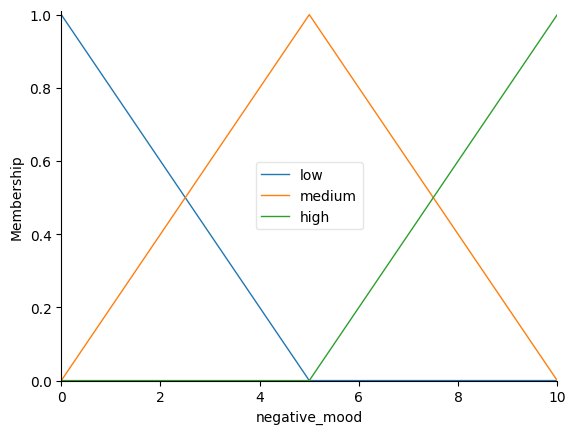

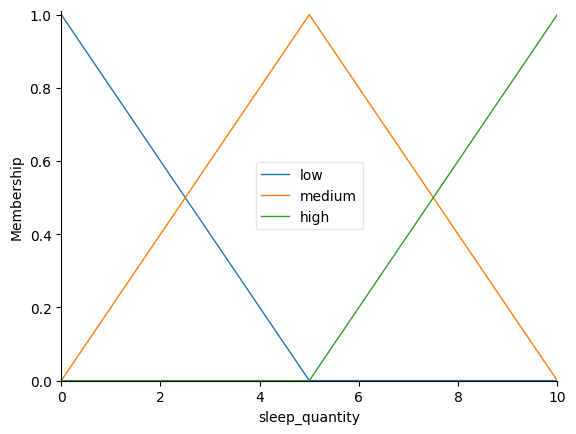

In [20]:
negative_mood.view()
sleep_quantity.view()

In [25]:
depression_sim.input['negative_mood'] = 5
depression_sim.input['sleep_quantity'] = 2
depression_sim.input['energy_levels'] = 5
depression_sim.input['cognitive_decline'] = 5
depression_sim.input['social_engagement'] = 7
depression_sim.input['stress_levels'] = 9
# Compute and print the output
depression_sim.compute()
output_level = depression_sim.output['depression_level']

# Optionally, plot the results
#depression_level.view(sim=depression_sim)
# 33, 49, 65, 81


"""
very l = 2
l = 5
m = 7
h =9
"""
depression_sim.output['depression_level']

52.78666666666664

In [22]:
if 0 <= output_level < 33:
    print("Depression Level: Very Low. No significant depressive symptoms detected.")
elif 33 <= output_level < 49:
    print("Depression Level: Low. Mild depressive symptoms might be present. Consider seeking support or monitoring your well-being.")
elif 49 <= output_level < 67:
    print("Depression Level: Medium. Moderate depressive symptoms are likely. Seeking professional help is recommended.")
elif 67 <= output_level < 100:
    print("Depression Level: High. Significant depressive symptoms are present. Professional evaluation and treatment are strongly advised.")


Depression Level: Medium. Moderate depressive symptoms are likely. Seeking professional help is recommended.


In [23]:
import pickle

with open('OptimizedFuzzyDepression.pkl', 'wb') as f:
    pickle.dump(depression_sim, f)

'\nrange_values = np.arange(0, 11, 1)  # 0 to 10 with increment of 1\n\n# Loop through all combinations of input values\nfor negative_mood in range_values:\n    for sleep_quantity in range_values:\n        for energy_levels in range_values:\n            for cognitive_decline in range_values:\n                for social_engagement in range_values:\n                    for stress_levels in range_values:\n                        # Set the input values\n                        depression_sim.input[\'negative_mood\'] = negative_mood\n                        depression_sim.input[\'sleep_quantity\'] = sleep_quantity\n                        depression_sim.input[\'energy_levels\'] = energy_levels\n                        depression_sim.input[\'cognitive_decline\'] = cognitive_decline\n                        depression_sim.input[\'social_engagement\'] = social_engagement\n                        depression_sim.input[\'stress_levels\'] = stress_levels\n                        \n                